<h1 align="center">AI Chatbots Made Easy, Courtesy RASA</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Este tutorial é um resumo do maravilhoso trabalho de [Lakshmi Ajay](https://towardsdatascience.com/ai-chatbots-made-easy-courtesy-rasa-8ecdc2853e66). Seguiremos o passo a passo, fornecido por ela, para criar um chatbot de críquete usando [RASA](https://rasa.com/docs/rasa/) e Python. O foco do artigo é entender os fundamentos do `RASA` e mostrar a rapidez com que se pode começar a trabalhar com um bot.

# O que e por que da RASA

# O que é RASA?

O [RASA](https://rasa.com/docs/rasa/) é uma ferramenta de código aberto que usa compreensão de linguagem natural para desenvolver chatbots baseados em IA. Ele fornece uma estrutura que pode ser usada para criar chatbots com habilidades mínimas de codificação. O RASA permite que os usuários treinem e ajustem (`tune`) o modelo por meio de várias configurações. Sua facilidade de uso tornou uma opção popular entre desenvolvedores em todo o mundo para criar um chatbot de nível industrial.

# Por que RASA?

* É um framework de código aberto e gratuito
* É fácil começar
* Conhecimento prévio de codificação não é necessário para construir um bot básico

# Framework RASA

Existem duas atividades principais que qualquer chatbot deve realizar: `primeiro`, ele deve entender o que o usuário está tentando dizer e, em seguida, fornecer ao usuário uma resposta significativa. O RASA usa o `RASA NLU` e o `RASA core` para conseguir isso.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Xr4-QZ-gjPDbvZtq65Ygvg.png)

# Entendendo as terminologias

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*LbSPINN_j_g9xfyLXEHigA.png)

## Intent (`Intenção`)

* Intenção é identificar a intenção do usuário a partir da mensagem

* A classificação de intenção atribui um rótulo à mensagem do usuário

## Entity (`Entidade`)

* A extração de entidade extrai as informações úteis da mensagem do usuário

* Erros ortográficos e sinônimos comuns são tratados nos dados de treinamento

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*FE92ORMwuj-EUzeJufuDVQ.png)

## Resposta (`Response`)

* Resposta ou templates são as mensagens com as quais o bot responde

* Diferentes mensagens de texto podem ser definidas para um único tipo de resposta para que o bot não envie mensagens repetidas ao usuário

## Ação (Action)

* Action define como o bot responde ao usuário. Pode ser uma simples resposta de texto ou fazer uma consulta/pergunta ao usuário

* As ações customizadas também podem ser definidas com um trecho de código. É comumente usado para uma pesquisa de arquivo ou para fazer uma chamada de `API` externa

## Slot

* Os slots são como locais de memória no bot

* É usado para armazenar os campos que são obrigatórios durante a conversa

## Form (Formulário)

* Os formulários são usados ​​para coletar vários pontos de dados do usuário

* Ele usa `slots` para armazenar a entrada do usuário

# Passos para construir um `ChatBot` usando `RASA`

<font color='red'>1.-</font> Instalação e inicialização

<font color='red'>2.-</font> Criando o fluxo do usuário

<font color='red'>3.-</font> Ler desde `APIs` externas

<font color='red'>4.-</font> Construindo as jornadas do usuário

<font color='red'>5.-</font> Treinamento e teste usando a `CLI`

<font color='red'>6.-</font> Integração da interface do usuário (`UI`)

Neste exemplo, criaremos um `chatbot` básico de críquete que se conecta a uma `URL externa` para buscar os dados de críquete ao vivo.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*JCcesL5Ltf5n0e6UZG2zsQ.png)

# <font color="pink">PASSO 1:</font> Instalação e inicialização

É aconselhável instalar o `RASA` em um ambiente virtual separado, pois possui muitas dependências. Use o comando `pip` para instalar o rasa.

```
pip install rasa

# Check the rasa version
rasa --version
```

A [Lakshmi Ajay](https://towardsdatascience.com/ai-chatbots-made-easy-courtesy-rasa-8ecdc2853e66) usou a versão `rasa 3.1.0`, nós usaremos a versão `rasa 3.4.4`. Agora que o rasa está instalado, estamos prontos para começar. O Rasa fornece um projeto de amostra básico para começar. Dentro de uma nova pasta de projeto, execute o comando abaixo para configurar o projeto.

```
rasa init
```
Isso cria um projeto de amostra com todos os arquivos necessários para executar um chatbot básico. A estrutura do diretório após a inicialização é fornecida abaixo (na versão dela).

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*rAy4_RWXGhCdYuYRw2dAIQ.png)

Em nossa versão temos:

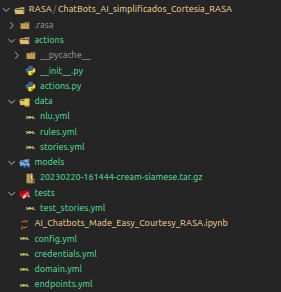

# <font color='pink'>PASSO 2:</font> Criando o fluxo do usuário

Existem dois arquivos principais a serem atualizados para o `fluxo do usuário`:

* `nlu.yml`

e 

* `domain.yml`

O arquivo `nlu.yml` contém todas as possíveis mensagens que o usuário pode inserir. O usuário pode fornecer a entrada em diferentes formas para a mesma intenção que é capturada neste arquivo.

<h1 align="center">nlu.yml</h1>

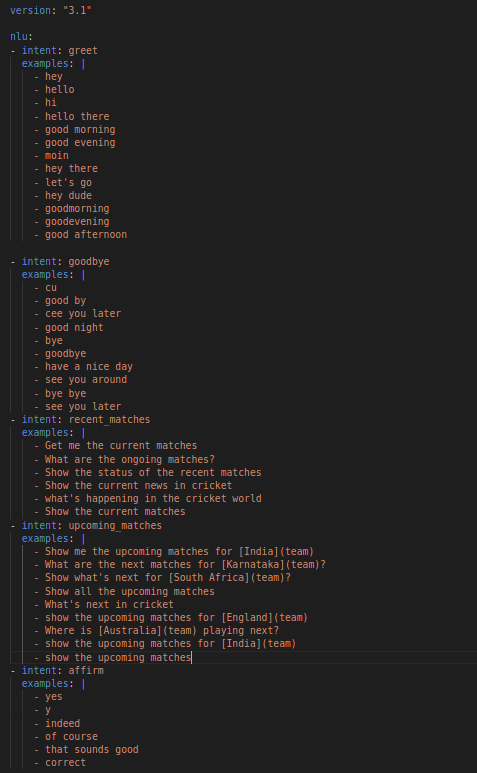


O arquivo `domain.yml` é como o arquivo mestre contendo informações sobre as intenções do usuário, respostas do bot, slots, formulários, ações, etc.

<h1 align="center">domain.yml</h1>

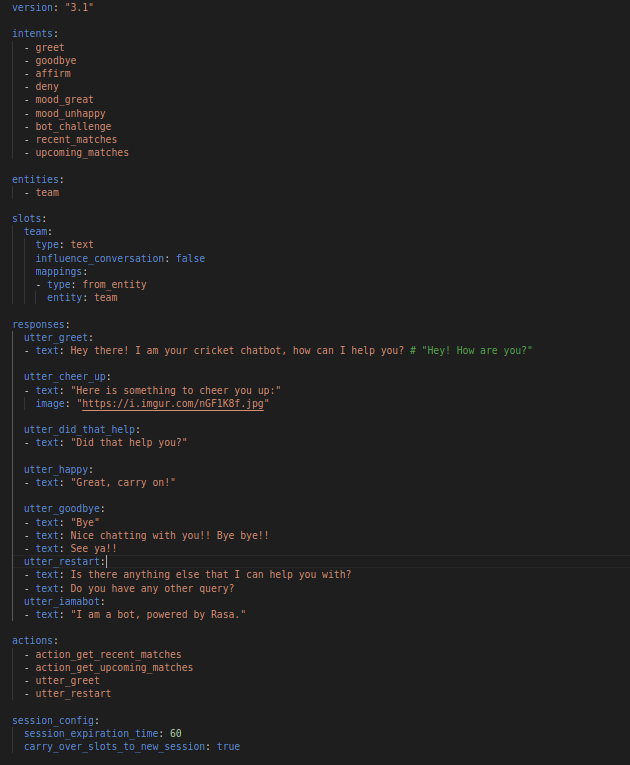

# <font color="pink">PASSO 3:</font> Leitura externa de uma API

Esta é uma etapa opcional aplicável se qualquer chamada de `API externa` for necessária para buscar os dados.

No `chatbot` de críquete (cricket) de exemplo, os dados de críquete são obtidos de uma fonte externa usando `APIs`.

O arquivo `actions.py` é usado para interagir com as `APIs externas`. No chatbot de críquete, usaremos o serviço [cricketdata api](https://cricketdata.org/). Este serviço fornece $100$ solicitações gratuitas diariamente, o que é suficiente para construir a versão de demonstração do `chatbot`.

Inscreva-se em [cricketdata.org](https://cricketdata.org/) para obter a `chave de API`. Use a chave de API no arquivo `actions.py` para se conectar ao url e buscar os dados.

`Duas ações são definidas neste chatbot de críquete`. Uma ação é obter os resultados de todas as partidas realizadas recentemente. A outra ação é obter a lista das próximas partidas, seja para um determinado time definido no `slot` ou para todos os times.